# Git commands

In [136]:
!git add Projet_final.ipynb
!git commit -m "update Projet_final.ipynb"
!git push origin master

[master a51e61d] add README
 1 file changed, 31 insertions(+), 3 deletions(-)
 rewrite README.md (96%)


fatal: HttpRequestException encountered.
   Une erreur s'est produite lors de l'envoi de la demande.
To https://github.com/Gaelll/HandWritten-Digits.git
   22f625b..a51e61d  master -> master


In [2]:
import pandas as pd
from sklearn import grid_search

In [3]:
df_train = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra", sep=",", header=None)
df_test = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes", sep=",", header=None)

In [4]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [5]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


In [6]:
df_train.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64],
           dtype='int64')

#### Renommer la dernière colonne qui est la cible 

In [71]:
new_columns = list(df_train.columns)
new_columns[-1] = 'Target'
df_train.columns = new_columns
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Target
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [72]:
new_columns = list(df_test.columns)
new_columns[-1] = 'Target'
df_test.columns = new_columns
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


#### Split des données 

In [74]:
X_train = df_train[df_train.columns[:-1]]
X_test = df_test[df_test.columns[:-1]]
y_train = df_train[df_train.columns[-1]]
y_test = df_test[df_test.columns[-1]]

In [75]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,0,6,14,7,1,0,0
1,0,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,0,9,14,0,0,0,0
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,0,1,15,2,0,0
4,0,0,5,14,4,0,0,0,0,0,...,12,0,0,0,4,12,14,7,0,0


In [76]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,0,6,13,10,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,0,11,16,10,0,0
2,0,0,0,4,15,12,0,0,0,0,...,5,0,0,0,0,3,11,16,9,0
3,0,0,7,15,13,1,0,0,0,8,...,9,0,0,0,7,13,13,9,0,0
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,0,2,16,4,0,0


In [77]:
y_train.head()

0    0
1    0
2    7
3    4
4    6
Name: Target, dtype: int64

In [78]:
y_test.head()

0    0
1    1
2    2
3    3
4    4
Name: Target, dtype: int64

## Répartition des classes dans les jeux train et test 

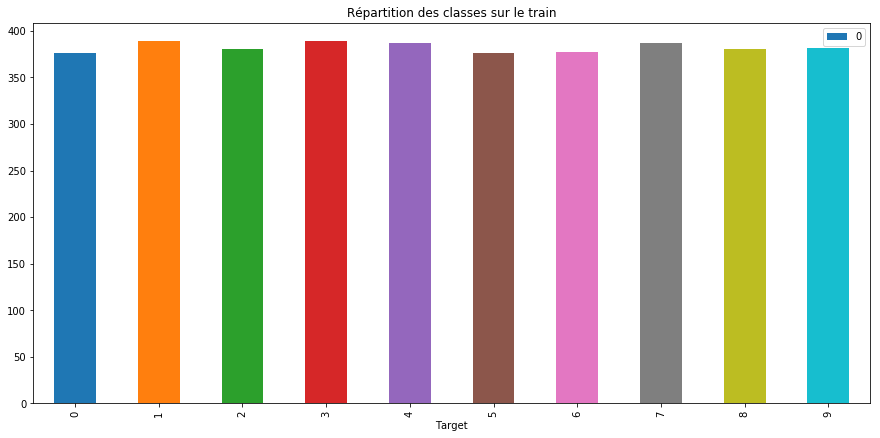

In [135]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))

# use unstack()
title= 'Répartition des classes sur le train'
df_train.groupby(['Target']).count()[0].plot(kind = 'bar', ax=ax, legend = True, title = title)
plt.show()

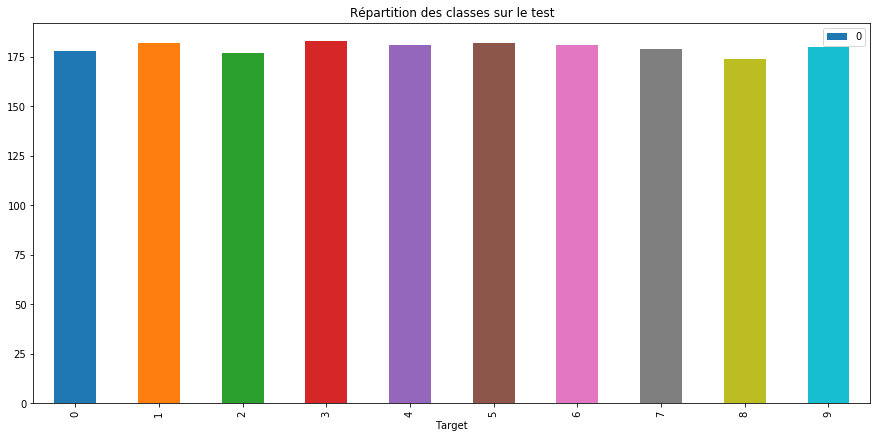

In [127]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))

# use unstack()
title= 'Répartition des classes sur le test'
df_test.groupby(['Target']).count()[0].plot(kind = 'bar', ax=ax, legend = True, title = title)
plt.show()

# Standardiser les valeurs

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)                 # Il ne faut fiter que sur les data d'entrainement
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test) 

# Modelisation 

### RandomForestClassifier 

In [19]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\Gael\Anaconda2\envs\ML_A5\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [93]:
rdmFC = RandomForestClassifier(n_estimators=500)
modele = rdmFC.fit(X_train, y_train)
rdmFCperf = modele.score(X_test, y_test)

performances["RdmFC"] = [rdmFCperf]
rdmFCperf

0.9732888146911519

##### Grid Search for RandomForestClassifier 

In [36]:
parameters = {  'n_estimators' : [50, 100, 150, 200, 500]           }
grid       = grid_search.GridSearchCV(rdmFC, parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_estimator_)

0.9795971749934607 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [37]:
parameters = {  'n_estimators' : [500, 700, 900]           }
grid       = grid_search.GridSearchCV(rdmFC, parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_estimator_)

0.9798587496730317 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [38]:
parameters = {  'n_estimators' : [600, 650, 700, 750]           }
grid       = grid_search.GridSearchCV(rdmFC, parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_estimator_)

0.9793356003138897 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [39]:
parameters = {  'n_estimators' : [500, 550, 570, 590]           }
grid       = grid_search.GridSearchCV(rdmFC, parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_estimator_)

0.9801203243526027 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=550, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


##### RandomForestClassifier optimized after Grid Search 

In [94]:
rdmFCopti = RandomForestClassifier(n_estimators=550)
modele = rdmFCopti.fit(X_train, y_train)
rdmFCoptiPerf = modele.score(X_test, y_test)

performances["RdmFCopti"] = [rdmFCoptiPerf]
rdmFCoptiPerf

0.9744017807456873

### Xgboost

In [21]:
!pip install catboost

You are using pip version 9.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [22]:
from xgboost import XGBClassifier

In [95]:
xgbC   = XGBClassifier()
modele = xgbC.fit(X_train, y_train)
xgbCperf = modele.score(X_test, y_test)

performances["xgbC"] = [xgbCperf]
xgbCperf

C:\Users\Gael\Anaconda2\envs\ML_A5\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9577072899276572

##### Grid Search for xgbClassifier 

In [41]:
parameters = {  'loss' : ['deviance', 'exponential'],
                 'n_estimators' : [100, 200, 300, 400, 500, 600, 700],
                 'criterion' : ['friedman_mse', 'mse', 'mae']}
grid       = grid_search.GridSearchCV(xgbC, parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_estimator_)

0.9772430028773215 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, criterion='friedman_mse', gamma=0,
       learning_rate=0.1, loss='deviance', max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


##### xgboost optimized after Grid Search 

In [96]:
xgbCopti   = XGBClassifier(criterion='friedman_mse', loss='deviance', n_estimators=500)
modele = xgbCopti.fit(X_train, y_train)
xgbCoptiPerf = modele.score(X_test, y_test)

performances["xgbCopti"] = [xgbCoptiPerf]
xgbCoptiPerf

C:\Users\Gael\Anaconda2\envs\ML_A5\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9677239844184753

### Catboost

In [24]:
from catboost import CatBoostClassifier

In [97]:
catBoost   = CatBoostClassifier()
modele = catBoost.fit(X_train, y_train)
catBoostPerf = modele.score(X_test, y_test)

performances["catBoost"] = [catBoostPerf]
catBoostPerf

Learning rate set to 0.024488
0:	learn: 0.6289514	total: 48.2ms	remaining: 48.2s
1:	learn: 0.5686702	total: 94.7ms	remaining: 47.2s
2:	learn: 0.5150926	total: 138ms	remaining: 46s
3:	learn: 0.4692283	total: 181ms	remaining: 45s
4:	learn: 0.4213785	total: 224ms	remaining: 44.6s
5:	learn: 0.3840300	total: 279ms	remaining: 46.2s
6:	learn: 0.3497690	total: 333ms	remaining: 47.2s
7:	learn: 0.3197194	total: 382ms	remaining: 47.4s
8:	learn: 0.2930547	total: 431ms	remaining: 47.5s
9:	learn: 0.2665030	total: 487ms	remaining: 48.2s
10:	learn: 0.2428607	total: 541ms	remaining: 48.7s
11:	learn: 0.2220200	total: 594ms	remaining: 48.9s
12:	learn: 0.2033912	total: 644ms	remaining: 48.9s
13:	learn: 0.1854017	total: 687ms	remaining: 48.4s
14:	learn: 0.1723348	total: 741ms	remaining: 48.7s
15:	learn: 0.1590329	total: 795ms	remaining: 48.9s
16:	learn: 0.1463585	total: 843ms	remaining: 48.8s
17:	learn: 0.1378680	total: 899ms	remaining: 49s
18:	learn: 0.1278102	total: 958ms	remaining: 49.5s
19:	learn: 0.11

163:	learn: 0.0038917	total: 8.68s	remaining: 44.2s
164:	learn: 0.0038446	total: 8.73s	remaining: 44.2s
165:	learn: 0.0037961	total: 8.79s	remaining: 44.1s
166:	learn: 0.0037514	total: 8.84s	remaining: 44.1s
167:	learn: 0.0037350	total: 8.89s	remaining: 44s
168:	learn: 0.0036776	total: 8.94s	remaining: 44s
169:	learn: 0.0036516	total: 8.99s	remaining: 43.9s
170:	learn: 0.0036084	total: 9.04s	remaining: 43.9s
171:	learn: 0.0035512	total: 9.11s	remaining: 43.8s
172:	learn: 0.0035389	total: 9.16s	remaining: 43.8s
173:	learn: 0.0034964	total: 9.21s	remaining: 43.7s
174:	learn: 0.0034890	total: 9.25s	remaining: 43.6s
175:	learn: 0.0034502	total: 9.3s	remaining: 43.5s
176:	learn: 0.0033971	total: 9.36s	remaining: 43.5s
177:	learn: 0.0033713	total: 9.41s	remaining: 43.4s
178:	learn: 0.0033208	total: 9.46s	remaining: 43.4s
179:	learn: 0.0032820	total: 9.51s	remaining: 43.3s
180:	learn: 0.0032411	total: 9.56s	remaining: 43.3s
181:	learn: 0.0032001	total: 9.61s	remaining: 43.2s
182:	learn: 0.003

323:	learn: 0.0011064	total: 17.3s	remaining: 36.1s
324:	learn: 0.0010997	total: 17.4s	remaining: 36.1s
325:	learn: 0.0010919	total: 17.4s	remaining: 36s
326:	learn: 0.0010856	total: 17.5s	remaining: 36s
327:	learn: 0.0010757	total: 17.5s	remaining: 35.9s
328:	learn: 0.0010684	total: 17.6s	remaining: 35.9s
329:	learn: 0.0010631	total: 17.6s	remaining: 35.8s
330:	learn: 0.0010568	total: 17.7s	remaining: 35.8s
331:	learn: 0.0010507	total: 17.8s	remaining: 35.7s
332:	learn: 0.0010431	total: 17.8s	remaining: 35.7s
333:	learn: 0.0010370	total: 17.9s	remaining: 35.7s
334:	learn: 0.0010317	total: 17.9s	remaining: 35.6s
335:	learn: 0.0010251	total: 18s	remaining: 35.6s
336:	learn: 0.0010183	total: 18s	remaining: 35.5s
337:	learn: 0.0010130	total: 18.1s	remaining: 35.4s
338:	learn: 0.0010073	total: 18.1s	remaining: 35.4s
339:	learn: 0.0010011	total: 18.2s	remaining: 35.3s
340:	learn: 0.0009962	total: 18.2s	remaining: 35.3s
341:	learn: 0.0009901	total: 18.3s	remaining: 35.2s
342:	learn: 0.000983

485:	learn: 0.0005528	total: 25.9s	remaining: 27.4s
486:	learn: 0.0005513	total: 25.9s	remaining: 27.3s
487:	learn: 0.0005497	total: 26s	remaining: 27.3s
488:	learn: 0.0005479	total: 26s	remaining: 27.2s
489:	learn: 0.0005463	total: 26.1s	remaining: 27.2s
490:	learn: 0.0005446	total: 26.2s	remaining: 27.1s
491:	learn: 0.0005426	total: 26.2s	remaining: 27.1s
492:	learn: 0.0005417	total: 26.3s	remaining: 27s
493:	learn: 0.0005397	total: 26.3s	remaining: 26.9s
494:	learn: 0.0005381	total: 26.4s	remaining: 26.9s
495:	learn: 0.0005368	total: 26.4s	remaining: 26.8s
496:	learn: 0.0005351	total: 26.5s	remaining: 26.8s
497:	learn: 0.0005340	total: 26.5s	remaining: 26.7s
498:	learn: 0.0005324	total: 26.6s	remaining: 26.7s
499:	learn: 0.0005304	total: 26.6s	remaining: 26.6s
500:	learn: 0.0005285	total: 26.7s	remaining: 26.6s
501:	learn: 0.0005272	total: 26.7s	remaining: 26.5s
502:	learn: 0.0005262	total: 26.8s	remaining: 26.4s
503:	learn: 0.0005244	total: 26.8s	remaining: 26.4s
504:	learn: 0.0005

644:	learn: 0.0003638	total: 34.1s	remaining: 18.8s
645:	learn: 0.0003632	total: 34.2s	remaining: 18.7s
646:	learn: 0.0003624	total: 34.2s	remaining: 18.7s
647:	learn: 0.0003614	total: 34.3s	remaining: 18.6s
648:	learn: 0.0003605	total: 34.3s	remaining: 18.6s
649:	learn: 0.0003600	total: 34.4s	remaining: 18.5s
650:	learn: 0.0003592	total: 34.4s	remaining: 18.5s
651:	learn: 0.0003585	total: 34.5s	remaining: 18.4s
652:	learn: 0.0003575	total: 34.6s	remaining: 18.4s
653:	learn: 0.0003569	total: 34.6s	remaining: 18.3s
654:	learn: 0.0003561	total: 34.7s	remaining: 18.3s
655:	learn: 0.0003554	total: 34.7s	remaining: 18.2s
656:	learn: 0.0003549	total: 34.8s	remaining: 18.1s
657:	learn: 0.0003538	total: 34.8s	remaining: 18.1s
658:	learn: 0.0003531	total: 34.9s	remaining: 18s
659:	learn: 0.0003526	total: 34.9s	remaining: 18s
660:	learn: 0.0003518	total: 35s	remaining: 17.9s
661:	learn: 0.0003512	total: 35s	remaining: 17.9s
662:	learn: 0.0003506	total: 35.1s	remaining: 17.8s
663:	learn: 0.000350

807:	learn: 0.0002726	total: 42.2s	remaining: 10s
808:	learn: 0.0002721	total: 42.2s	remaining: 9.97s
809:	learn: 0.0002716	total: 42.3s	remaining: 9.92s
810:	learn: 0.0002713	total: 42.3s	remaining: 9.87s
811:	learn: 0.0002709	total: 42.4s	remaining: 9.81s
812:	learn: 0.0002706	total: 42.4s	remaining: 9.76s
813:	learn: 0.0002703	total: 42.5s	remaining: 9.71s
814:	learn: 0.0002700	total: 42.5s	remaining: 9.65s
815:	learn: 0.0002696	total: 42.6s	remaining: 9.6s
816:	learn: 0.0002692	total: 42.6s	remaining: 9.55s
817:	learn: 0.0002688	total: 42.7s	remaining: 9.49s
818:	learn: 0.0002683	total: 42.7s	remaining: 9.44s
819:	learn: 0.0002678	total: 42.8s	remaining: 9.38s
820:	learn: 0.0002673	total: 42.8s	remaining: 9.33s
821:	learn: 0.0002669	total: 42.8s	remaining: 9.28s
822:	learn: 0.0002665	total: 42.9s	remaining: 9.22s
823:	learn: 0.0002662	total: 42.9s	remaining: 9.17s
824:	learn: 0.0002659	total: 43s	remaining: 9.12s
825:	learn: 0.0002657	total: 43s	remaining: 9.06s
826:	learn: 0.00026

969:	learn: 0.0002184	total: 50.4s	remaining: 1.56s
970:	learn: 0.0002182	total: 50.4s	remaining: 1.51s
971:	learn: 0.0002180	total: 50.5s	remaining: 1.45s
972:	learn: 0.0002177	total: 50.5s	remaining: 1.4s
973:	learn: 0.0002174	total: 50.6s	remaining: 1.35s
974:	learn: 0.0002173	total: 50.6s	remaining: 1.3s
975:	learn: 0.0002170	total: 50.7s	remaining: 1.25s
976:	learn: 0.0002167	total: 50.7s	remaining: 1.19s
977:	learn: 0.0002164	total: 50.8s	remaining: 1.14s
978:	learn: 0.0002161	total: 50.8s	remaining: 1.09s
979:	learn: 0.0002159	total: 50.9s	remaining: 1.04s
980:	learn: 0.0002156	total: 50.9s	remaining: 986ms
981:	learn: 0.0002154	total: 50.9s	remaining: 934ms
982:	learn: 0.0002152	total: 51s	remaining: 882ms
983:	learn: 0.0002150	total: 51s	remaining: 830ms
984:	learn: 0.0002148	total: 51.1s	remaining: 778ms
985:	learn: 0.0002144	total: 51.1s	remaining: 726ms
986:	learn: 0.0002141	total: 51.2s	remaining: 674ms
987:	learn: 0.0002138	total: 51.2s	remaining: 622ms
988:	learn: 0.0002

0.19977740678909292

### KNN classifier 

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
knnC = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
modele = knnC.fit(X_train, y_train)
knnCperf = modele.score(X_test, y_test)

performances["knnC"] = [knnCperf]
knnCperf

0.9788536449638287

##### Grid Search for KNN

In [49]:
parameters = {  'n_neighbors' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
                 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                 'metric' : ['minkowski', 'euclidean']}
grid       = grid_search.GridSearchCV(knnC, parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_estimator_)

0.9733193826837562 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


##### KNN optimized after Grid Search 

In [99]:
knnCopti = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
modele = knnCopti.fit(X_train, y_train)
knnCoptiPerf = modele.score(X_test, y_test)

performances["knnCopti"] = [knnCoptiPerf]
knnCoptiPerf

0.9782971619365609

## Performances des différents algorithmes 

In [100]:
performances

{'RdmFC': [0.9732888146911519],
 'RdmFCopti': [0.9744017807456873],
 'catBoost': [0.19977740678909292],
 'knnC': [0.9788536449638287],
 'knnCopti': [0.9782971619365609],
 'xgbC': [0.9577072899276572],
 'xgbCopti': [0.9677239844184753]}

In [103]:
df_perf = pd.DataFrame(performances).T
df_perf

,0
RdmFC,0.973289
RdmFCopti,0.974402
catBoost,0.199777
knnC,0.978854
knnCopti,0.978297
xgbC,0.957707
xgbCopti,0.967724


In [106]:
df_perf.columns = ["Performances"]
df_perf

,Performances
RdmFC,0.973289
RdmFCopti,0.974402
catBoost,0.199777
knnC,0.978854
knnCopti,0.978297
xgbC,0.957707
xgbCopti,0.967724


In [113]:
df_perf = df_perf.sort_values("Performances")
df_perf

,Performances
catBoost,0.199777
xgbC,0.957707
xgbCopti,0.967724
RdmFC,0.973289
RdmFCopti,0.974402
knnCopti,0.978297
knnC,0.978854


In [114]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

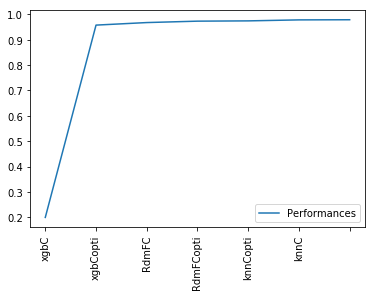

In [116]:
df_perf = df_perf.sort_values("Performances")
ax = df_perf.plot(rot=90, x_compat=True)
ax.xaxis.set_ticklabels(df_perf.index)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

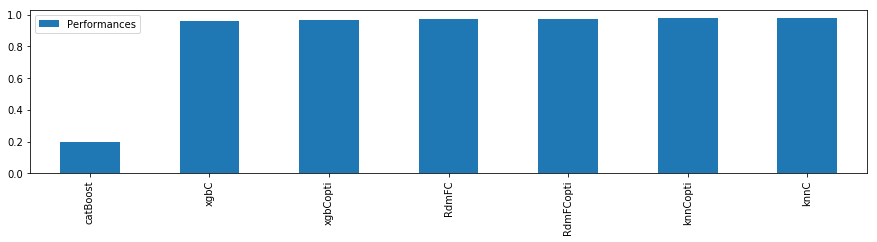

In [118]:
fig , axes = plt.subplots(1,1)
fig.set_size_inches(15,3)
df_perf = df_perf.sort_values("Performances")
axes.xaxis.set_ticklabels(df_perf.index)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
df_perf.plot(kind='bar', rot=90, ax=axes)

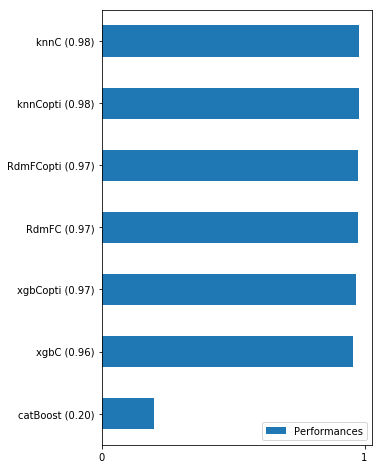

In [121]:
new_labels = []
for i, index in enumerate(df_perf.index):
    new_label = "%s (%.2f)"%(index,df_perf.Performances[i])
    new_labels.append(new_label.replace("\n", " "))
    
fig , axes = plt.subplots(1,1)
df_perf.index = new_labels
fig.set_size_inches(15,8)
fig.subplots_adjust(left=0.65)
df_perf.sort_values("Performances").plot(kind='barh', ax=axes)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))

pass
